# Plotting results

## Librairies

In [12]:
import io
import os
import re
import sys

In [13]:
import pickle
import time
from timeit import default_timer as timer

import numpy as np
import random

In [14]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

## Plots

In [22]:
# Baseline results
baselines_d = {'trec-6':  {'last' : 92.40, 'mean' : 89.80}, 
               'trec-50': {'last' : 77.00, 'mean' : 76.60}, 
               'sst-2':   {'last' : 80.67, 'mean' : 85.72}, 
               'imdb':    {'last' : 81.28, 'mean' : 88.61}, 
               'ag-news': {'last' : 87.46, 'mean' : 90.59}
              }

In [23]:
# plot function
def plot(dataset, pooling_strategy, results_d):

    dims = list(results_d.keys())
    dims.sort()

    acc_bs = baselines_d[dataset][pooling_strategy]

    acc_esn = np.array([results_d[x]['esn'][0] for x in dims])
    std_esn = np.array([results_d[x]['esn'][1] for x in dims])

    acc_xlm = np.array([results_d[x]['linear_layer'][0] for x in dims])
    std_xlm = np.array([results_d[x]['linear_layer'][1] for x in dims])


    fig = plt.figure(figsize=(8, 4.5))

    ax = fig.add_subplot(111)

    # Baselines
    ax.axhline(y=acc_bs, linestyle='--', linewidth=3, color='grey', label=f'baseline ({pooling_strategy})', alpha=1)

    # ESNs
    ax.errorbar(dims, acc_esn, std_esn, color='C0', elinewidth=1, linewidth=2, label=f'ESN ({pooling_strategy})', marker='o', alpha=1)
    ax.fill_between(dims, acc_esn-std_esn, acc_esn+std_esn, alpha=0.2)
    # ax.plot(dims, acc_esn, color='C0', linewidth=3, label=f'ESN ({pooling_strategy})', marker='o', alpha=1)

    # XLM
    ax.errorbar(dims, acc_xlm, std_xlm, color='C1', elinewidth=1, linewidth=2, label=f'XLM ({pooling_strategy})', marker='o', alpha=1)
    ax.fill_between(dims, acc_xlm-std_xlm, acc_xlm+std_xlm, alpha=0.2)
    # ax.plot(dims, acc_xlm, color='C1', linewidth=3, label=f'XLM ({pooling_strategy})', marker='o', alpha=1)

    ax.set_title(dataset.upper() + f' ({pooling_strategy})', fontsize=15)
    ax.set_ylabel('test accuracy', fontsize=15)
    ax.set_xlabel('hidden dimension', fontsize=15)
    ax.tick_params(axis="x", labelsize=12)
    ax.tick_params(axis="y", labelsize=12)

    # change legend order
    handles,labels = ax.get_legend_handles_labels()
    handles = [handles[0], handles[2], handles[1]]
    labels = [labels[0], labels[2], labels[1]]

    plt.legend(handles, labels, loc='lower center', prop={'size': 12}, ncol=3, bbox_to_anchor=(0.5, -0.35))
    plt.savefig('plots/' + dataset + '-' + pooling_strategy + '.pdf', bbox_inches = 'tight')

RESULTS FILE: trec-6_results_esn_uniform_last-pooling_FINAL.pkl
RESULTS FILE: trec-6_results_esn_uniform_mean-pooling_FINAL.pkl
RESULTS FILE: trec-50_results_esn_uniform_last-pooling_FINAL.pkl
RESULTS FILE: trec-50_results_esn_uniform_mean-pooling_FINAL.pkl
RESULTS FILE: sst-2_results_esn_uniform_last-pooling_FINAL.pkl
RESULTS FILE: sst-2_results_esn_uniform_mean-pooling_FINAL.pkl
RESULTS FILE: ag-news_results_esn_uniform_last-pooling_FINAL.pkl
RESULTS FILE: ag-news_results_esn_uniform_mean-pooling_FINAL.pkl
RESULTS FILE: imdb_results_esn_uniform_last-pooling_FINAL.pkl
RESULTS FILE: imdb_results_esn_uniform_mean-pooling_FINAL.pkl


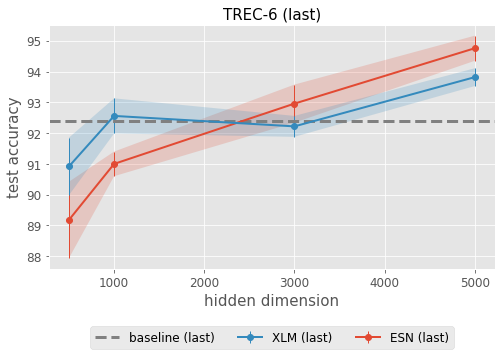

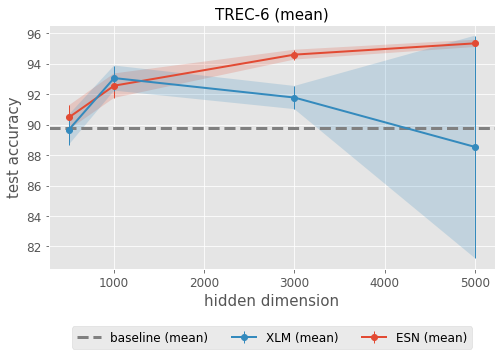

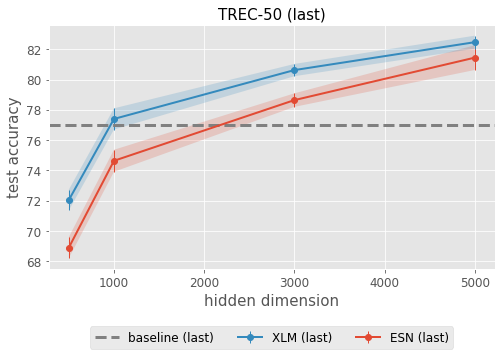

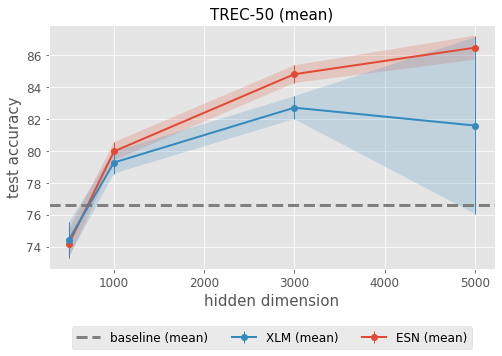

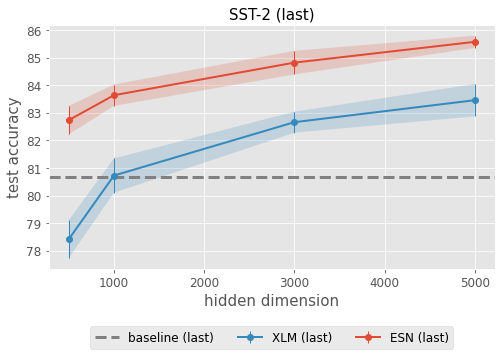

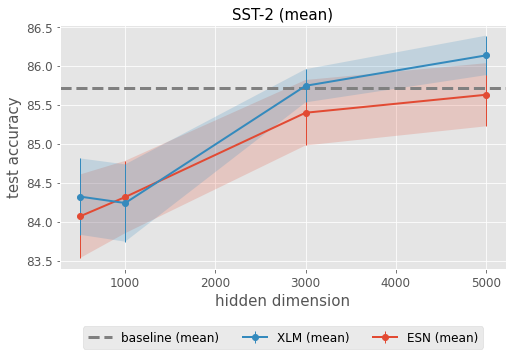

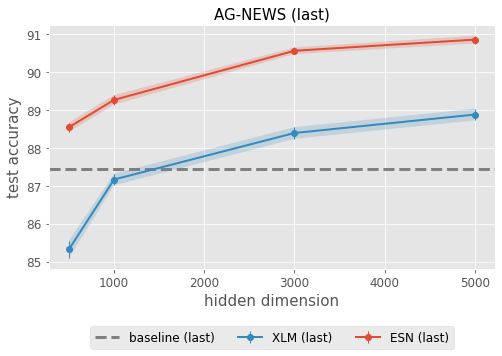

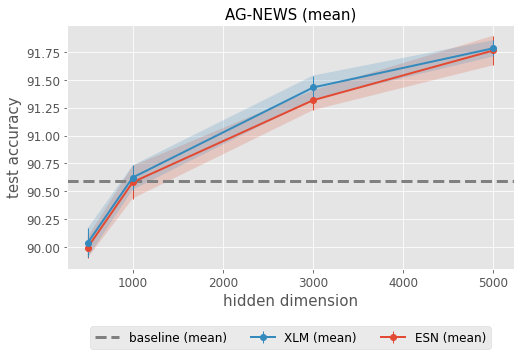

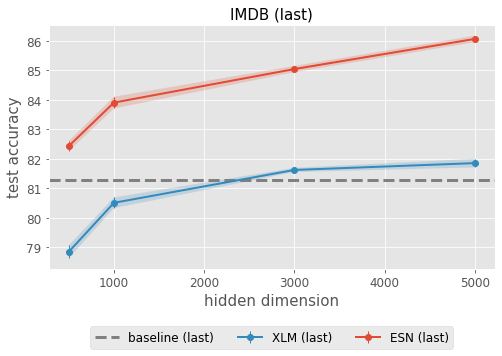

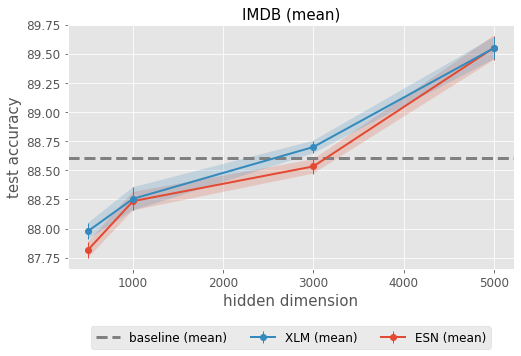

In [24]:
# create plots
RESULTS_PATH = '/raid/home/jeremiec/Ax_results/ESN_v2' # put your path here

for dataset in ['trec-6', 'trec-50', 'sst-2', 'ag-news', 'imdb']:

    for pooling_strategy in ['last', 'mean']:
            
        RESULTS_FILE = f'{dataset}_results_esn_uniform_{pooling_strategy}-pooling_FINAL.pkl'
        # RESULTS_FILE = f'{dataset}_results_{pooling_strategy}.pkl'
        print('RESULTS FILE:', RESULTS_FILE)
        
        with open(os.path.join(RESULTS_PATH, RESULTS_FILE), 'rb') as fh:
            results_d = pickle.load(fh)
            
        plot(dataset, pooling_strategy, results_d)

In [9]:
RESULTS_PATH
imdb_mean_file = 'imdb_results_esn_uniform_mean-pooling_FINAL.pkl'

In [10]:
with open(os.path.join(RESULTS_PATH, imdb_mean_file), 'rb') as fh:
    results_d = pickle.load(fh)

In [11]:
results_d

{500: {'esn': [87.81639785766602,
   0.0688061391536171,
   143.83524051122367,
   0.6000597409976358],
  'linear_layer': [87.97759780883788,
   0.07011269245592396,
   142.33672201512383,
   1.1021718848992539]},
 1000: {'esn': [88.23559875488282,
   0.07867728533296,
   143.49037335151806,
   0.22089324570467964],
  'linear_layer': [88.25559844970704,
   0.0994768534945526,
   141.88493295852095,
   0.7295486134595209]},
 3000: {'esn': [88.53359832763672,
   0.06127137695289222,
   153.01142649250104,
   0.5841548698839655],
  'linear_layer': [88.69999694824219,
   0.0541989684099138,
   143.71596434321253,
   0.5109551023968537]},
 5000: {'esn': [89.55039672851562,
   0.10429543043682796,
   172.51981266820803,
   0.36124320212304506],
  'linear_layer': [89.54719848632813,
   0.09522615409578536,
   150.21069344552234,
   0.5584382214902571]}}